In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow
from tensorflow import keras

from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

In [25]:
train=pd.read_csv("C:\\Users\\91923\\Downloads\\train (1).csv")

In [26]:
train.shape

(18, 7)

In [27]:
train.columns

Index(['No', 'material', 'feedrate', 'clamp_pressure', 'tool_condition',
       'machining_finalized', 'passed_visual_inspection'],
      dtype='object')

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   No                        18 non-null     int64  
 1   material                  18 non-null     object 
 2   feedrate                  18 non-null     int64  
 3   clamp_pressure            18 non-null     float64
 4   tool_condition            18 non-null     object 
 5   machining_finalized       18 non-null     object 
 6   passed_visual_inspection  14 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.1+ KB


C:\Users\91923\AppData\Local\Temp\ipykernel_4176\3352319648.py:53: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


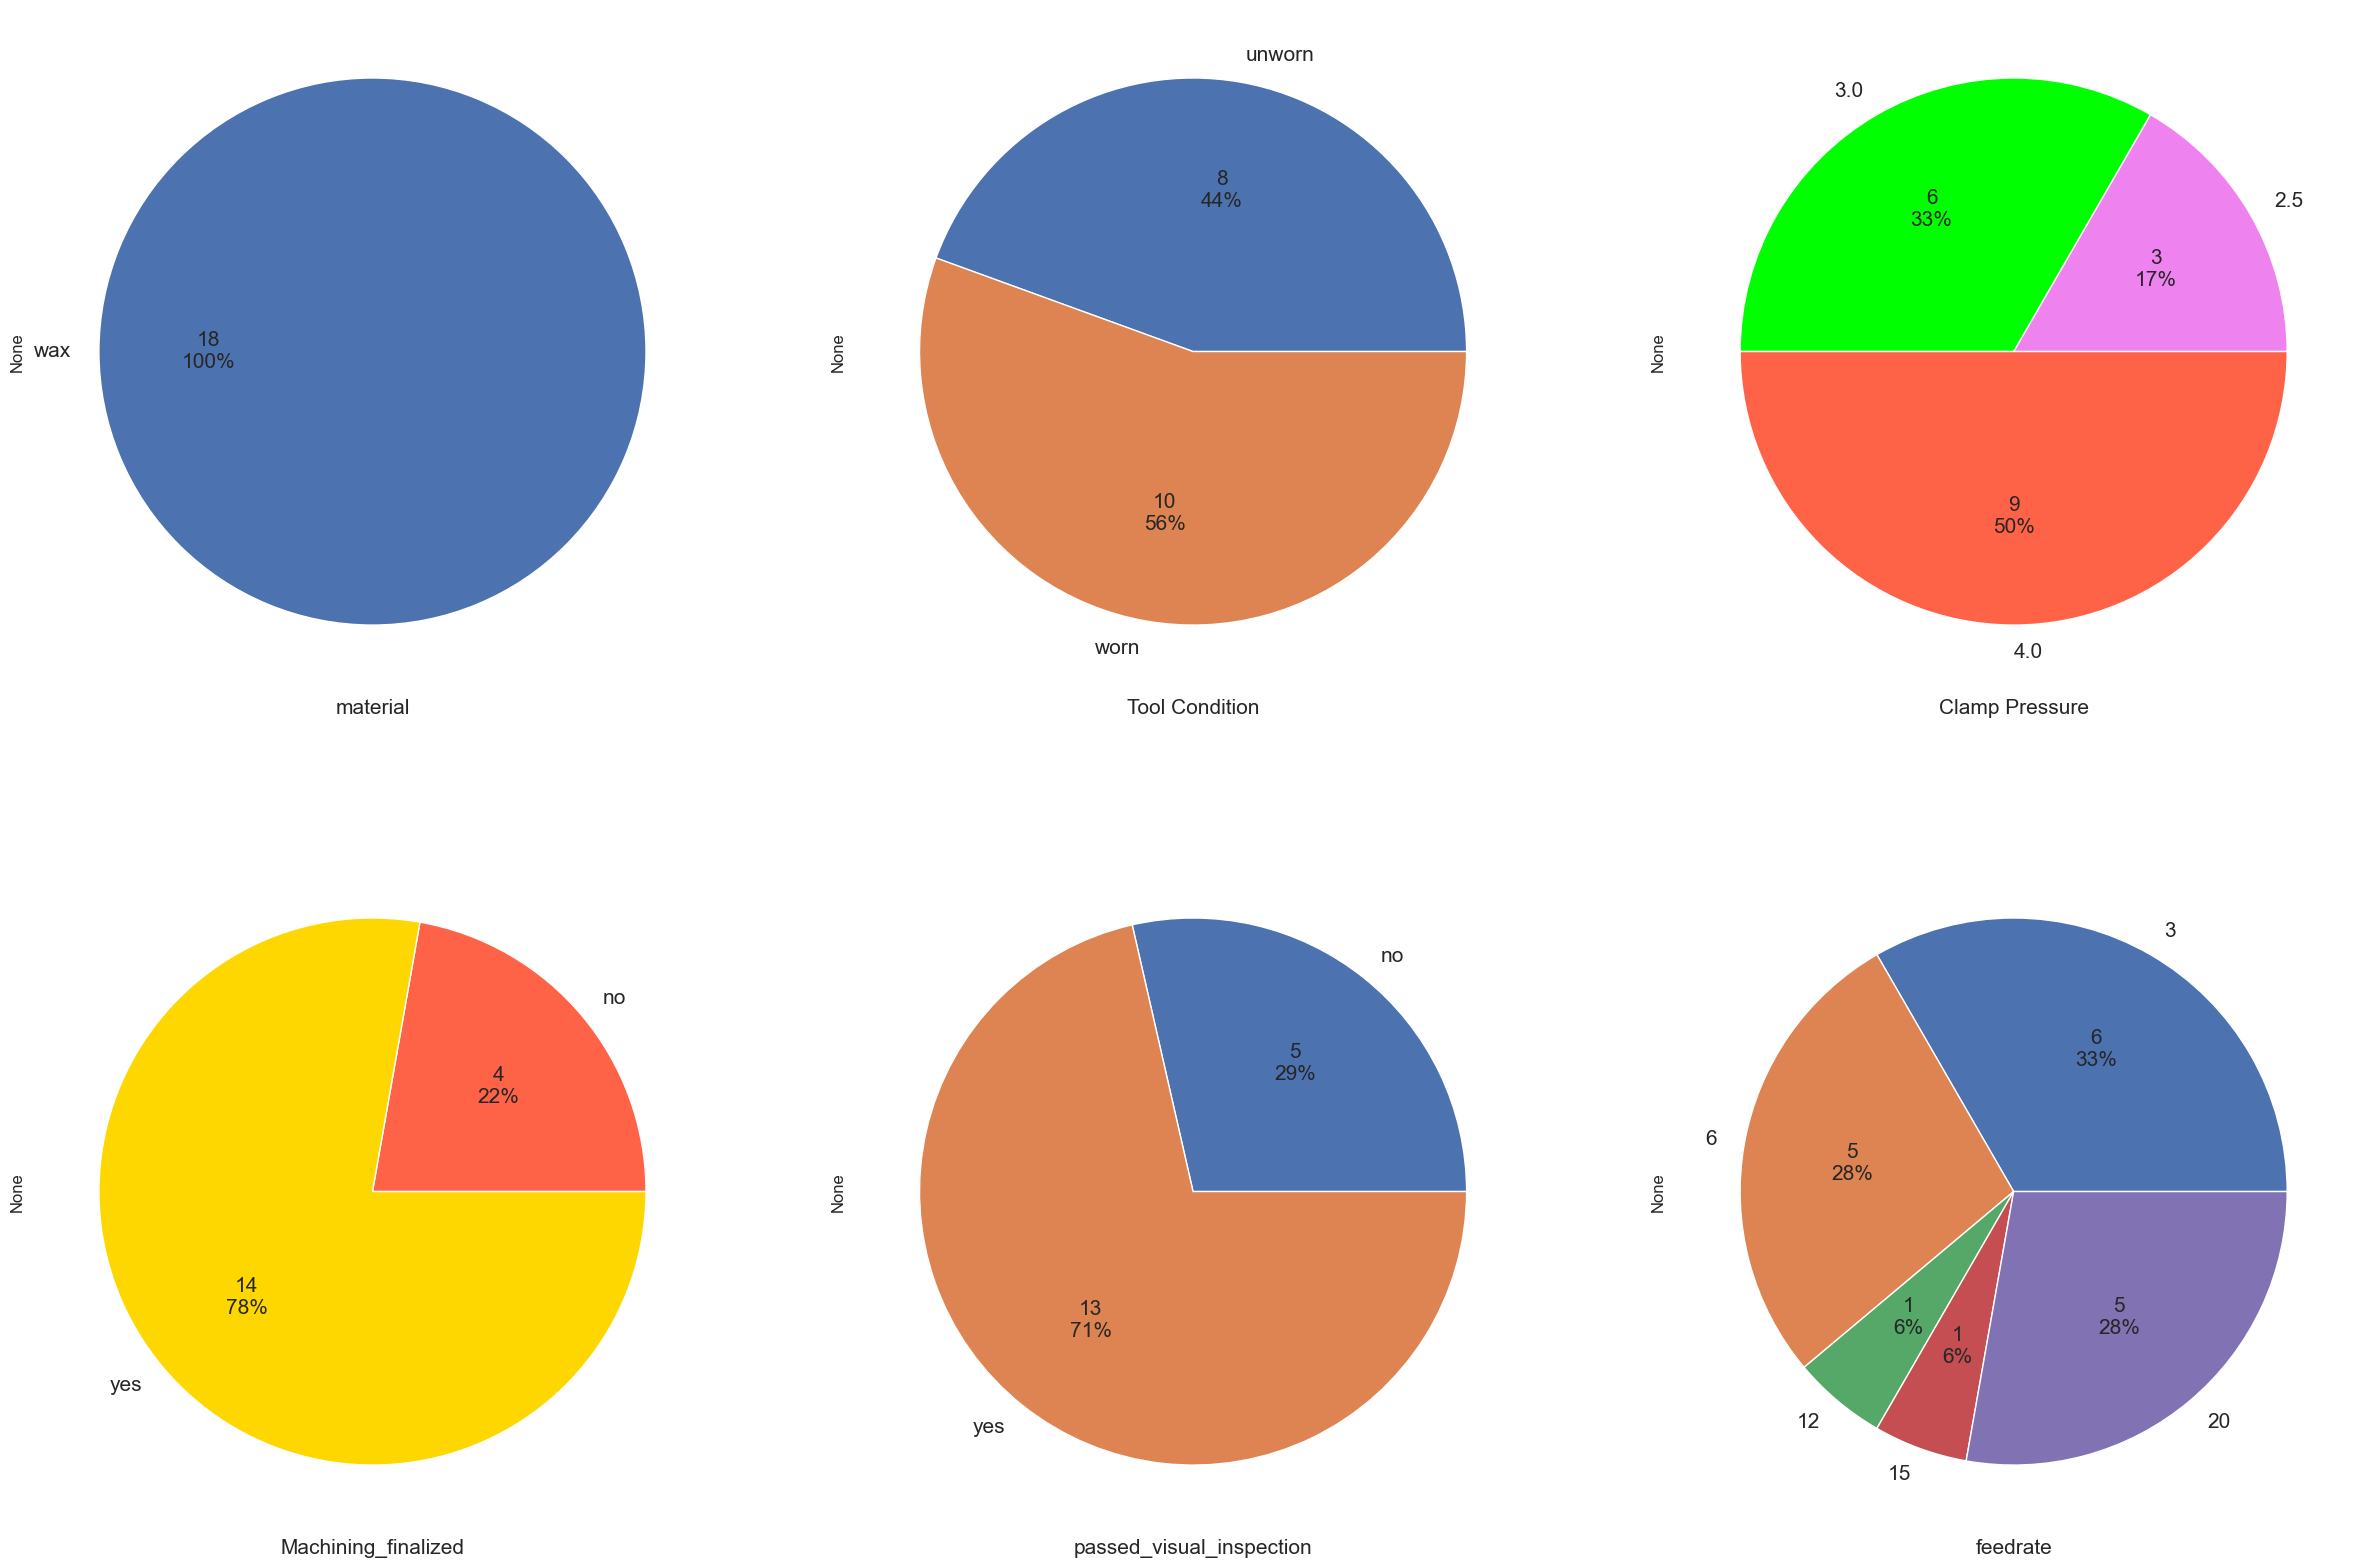

In [29]:
plt.style.use('seaborn-darkgrid')
fig, ((ax0,ax1,ax2),(ax3,ax4,ax5))=plt.subplots(nrows=2,
                                       ncols=3,
                                       figsize=(30, 20))
def label_function(val):
    return f'{val / 100 * len(train):.0f}\n{val:.0f}%'

# feedrate
train.groupby('material').size().plot(kind='pie',
                                      autopct=label_function, 
                                      textprops={'fontsize': 15},
                                      ax=ax0)                                         
ax0.set_xlabel('material',size=15)

# Tool Condition
train.groupby('tool_condition').size().plot(kind='pie', 
                                              autopct=label_function,
                                              textprops={'fontsize': 15},
                                              ax=ax1)
ax1.set_xlabel('Tool Condition',size=15)

# Pressure
train.groupby('clamp_pressure').size().plot(kind='pie', 
                                      autopct=label_function, 
                                      textprops={'fontsize': 15},
                                      colors=['violet', 'lime','tomato'],
                                      ax=ax2)
ax2.set_xlabel('Clamp Pressure',size=15)

# Machining Finalized
train.groupby('machining_finalized').size().plot(kind='pie',
                                                 autopct=label_function, 
                                                 textprops={'fontsize': 15},
                                                 colors=['tomato', 'gold','violet','lime'],
                                                 ax=ax3)
ax3.set_xlabel('Machining_finalized',size=15)

# passed_visual_inspection
train.groupby('passed_visual_inspection').size().plot(kind='pie',
                                                 autopct=label_function, 
                                                 textprops={'fontsize': 15},
                                                 ax=ax4)                                         
ax4.set_xlabel('passed_visual_inspection',size=15)

# feedrate
train.groupby('feedrate').size().plot(kind='pie',
                                      autopct=label_function, 
                                      textprops={'fontsize': 15},
                                      ax=ax5)                                         
ax5.set_xlabel('feedrate',size=15)

# showing the figure
fig.show()

In [30]:
frames=list()
for i in range(1,19):
    exp = '0' + str(i) if i < 10 else str(i)
    frame = pd.read_csv("C:\\Users\\91923\\Downloads\\experiment_{}.csv".format(exp))
    row = train[train['No'] == i]
    frame['target'] = 1 if row.iloc[0]['tool_condition'] == 'worn' else 0
    frames.append(frame)
df = pd.concat(frames, ignore_index = True)
df.head()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,target
0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,...,2.740000e-19,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,Starting,0
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,...,2.740000e-19,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,Prep,0
2,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,...,2.740000e-19,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0,Prep,0
3,194.0,-18.0,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,...,2.740000e-19,328.0,0.0,1.070000e-06,12.0,1.0,7.0,50.0,Prep,0
4,193.0,-17.9,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,...,2.740000e-19,328.0,0.0,1.960000e-06,12.0,1.0,7.0,50.0,Prep,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25286 entries, 0 to 25285
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  float64
 1   X1_ActualVelocity          25286 non-null  float64
 2   X1_ActualAcceleration      25286 non-null  float64
 3   X1_CommandPosition         25286 non-null  float64
 4   X1_CommandVelocity         25286 non-null  float64
 5   X1_CommandAcceleration     25286 non-null  float64
 6   X1_CurrentFeedback         25286 non-null  float64
 7   X1_DCBusVoltage            25286 non-null  float64
 8   X1_OutputCurrent           25286 non-null  float64
 9   X1_OutputVoltage           25286 non-null  float64
 10  X1_OutputPower             25286 non-null  float64
 11  Y1_ActualPosition          25286 non-null  float64
 12  Y1_ActualVelocity          25286 non-null  float64
 13  Y1_ActualAcceleration      25286 non-null  flo

In [32]:
def dummy_creation(dataset,dummy_categories):
  for i in dummy_categories:
    dataset_dummy=pd.get_dummies(dataset[i])
    dataset=pd.concat([dataset,dataset_dummy],
                      axis=1)
    dataset=dataset.drop(i,axis=1)
  return dataset
df['Machining_Process'].unique()

array(['Starting', 'Prep', 'Layer 1 Up', 'Layer 1 Down', 'Repositioning',
       'Layer 2 Up', 'Layer 2 Down', 'Layer 3 Up', 'Layer 3 Down', 'end',
       'End'], dtype=object)

In [33]:
df=dummy_creation(df, ['Machining_Process'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25286 entries, 0 to 25285
Data columns (total 59 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  float64
 1   X1_ActualVelocity          25286 non-null  float64
 2   X1_ActualAcceleration      25286 non-null  float64
 3   X1_CommandPosition         25286 non-null  float64
 4   X1_CommandVelocity         25286 non-null  float64
 5   X1_CommandAcceleration     25286 non-null  float64
 6   X1_CurrentFeedback         25286 non-null  float64
 7   X1_DCBusVoltage            25286 non-null  float64
 8   X1_OutputCurrent           25286 non-null  float64
 9   X1_OutputVoltage           25286 non-null  float64
 10  X1_OutputPower             25286 non-null  float64
 11  Y1_ActualPosition          25286 non-null  float64
 12  Y1_ActualVelocity          25286 non-null  float64
 13  Y1_ActualAcceleration      25286 non-null  flo

In [34]:
features=df.drop('target',axis="columns")
labels=df['target']

from sklearn.model_selection import train_test_split
x_Train, x_Test, y_Train, y_Test=train_test_split(features,labels,test_size=0.2)

In [35]:
np.random.seed(42)

In [36]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier()
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [37]:
random_forest.fit(x_Train,y_Train)

RandomForestClassifier()

In [38]:
random_forest_acc=random_forest.score(x_Test,y_Test)

In [39]:
y_pred=random_forest.predict(x_Test)
accuracy_score(y_true=y_Test,
               y_pred=y_pred)


0.9911032028469751

In [40]:
confusion_matrix(y_true=y_Test,y_pred=y_pred)


array([[2444,   30],
       [  15, 2569]], dtype=int64)